## Customer Churn Prediction

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Loading the dataset
df= pd.read_excel(r"C:\Users\POWER\Desktop\programming\Machine Learning\Projects\telco_customer_churn.xlsx")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# datatypes of different columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


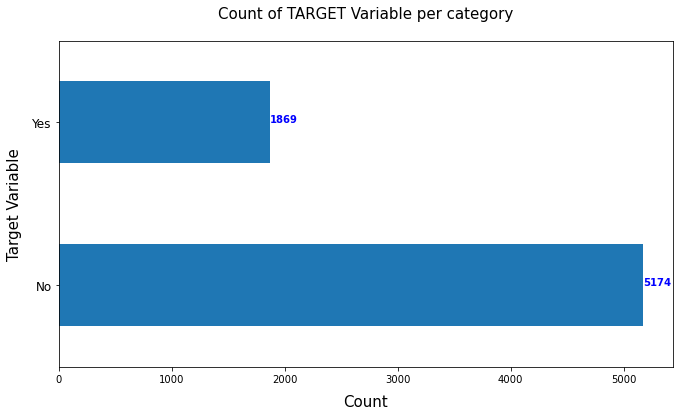

In [8]:
df['Churn'].value_counts().plot(kind='barh', figsize=(11, 6))
plt.xlabel("Count", labelpad=10, fontsize=15)
plt.ylabel("Target Variable", labelpad=10, fontsize=15)
plt.title("Count of TARGET Variable per category", y=1.05, fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
for i, v in enumerate(df["Churn"].value_counts()):
    plt.text(v , i , str(v), 
            color = 'blue', fontweight = 'bold')
plt.show()

In [9]:
print((df['Churn'].value_counts()/len(df["Churn"]))*100)
print("\n")
print(df['Churn'].value_counts())


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


No     5174
Yes    1869
Name: Churn, dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\POWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


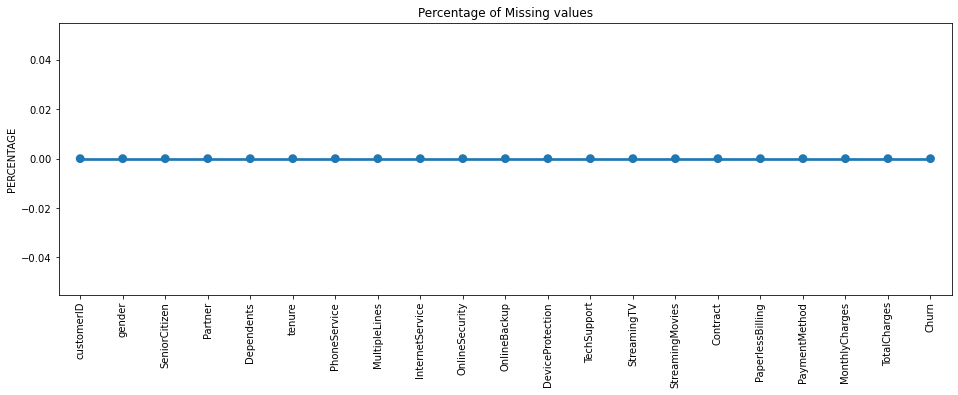

In [11]:
# Percentage of missing values (Not very imp to plot graph)
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0])
plt.figure(figsize=(16,5))
sns.pointplot(missing.index,0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [12]:
# looking for null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Cleaning



In [13]:
# Total charges have object values. Needs to be converted into numeric data.
df_copy = df.copy()

In [14]:
df_copy["TotalCharges"] = pd.to_numeric(df_copy["TotalCharges"], errors= "coerce")
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# There are 11 missing values in TotalCharges after converting it into numeric data

In [16]:
df_copy.loc[df_copy["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
#Removing missing values 
df_copy.dropna(how = 'any', inplace = True)

In [18]:
bins = [i for i in range(0,73,12)]
bins

[0, 12, 24, 36, 48, 60, 72]

(array([2058., 1047.,  876.,  748.,  820., 1483.]),
 array([ 0, 12, 24, 36, 48, 60, 72]),
 <BarContainer object of 6 artists>)

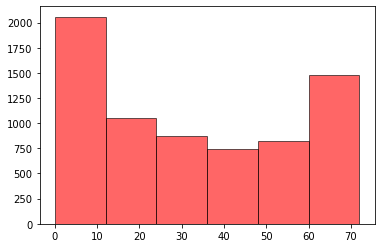

In [19]:
plt.hist(df_copy["tenure"], bins=bins, edgecolor='black', color="red", alpha=0.6)

In [20]:
labels = ["{} - {}".format(i, i + 11) for i in range(1, 72, 12)]
df_copy["tenure_group"] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels=labels)

In [21]:
df_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [22]:
#drop column customerID and tenure
df_copy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### EDA

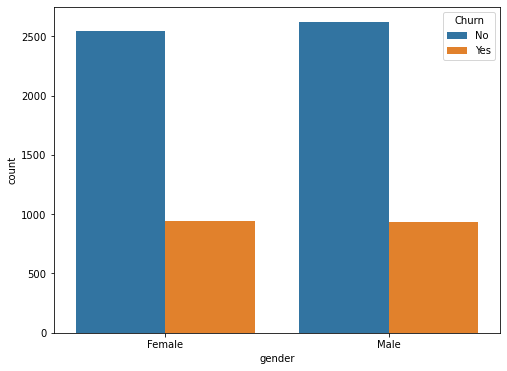

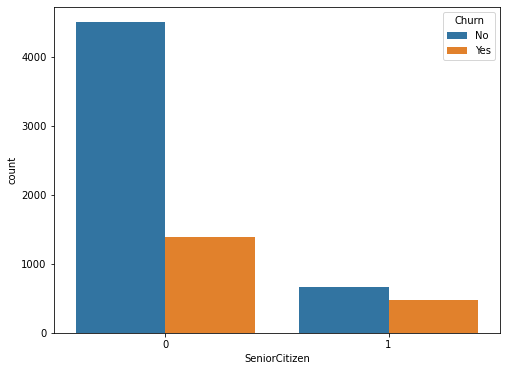

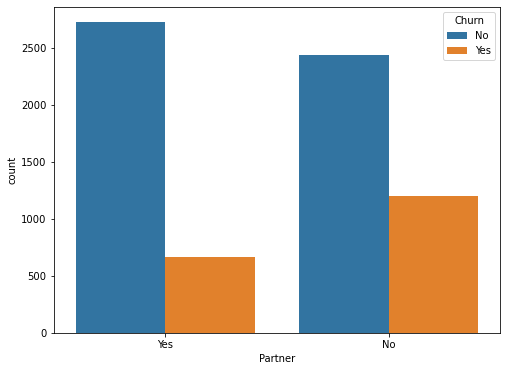

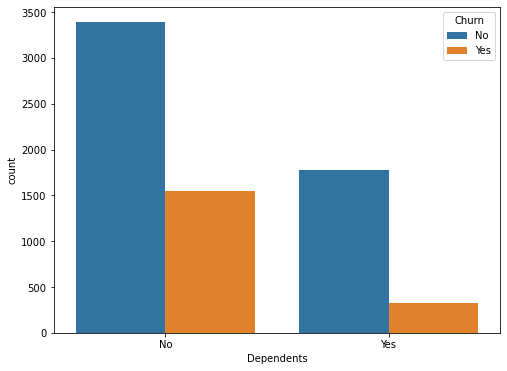

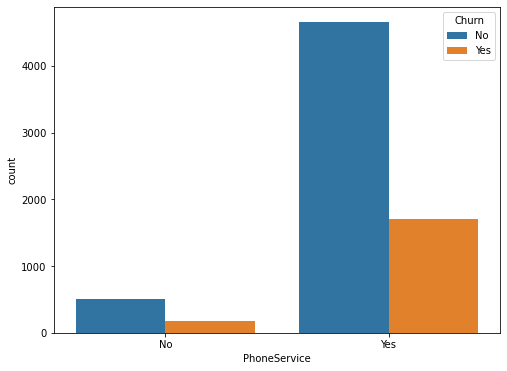

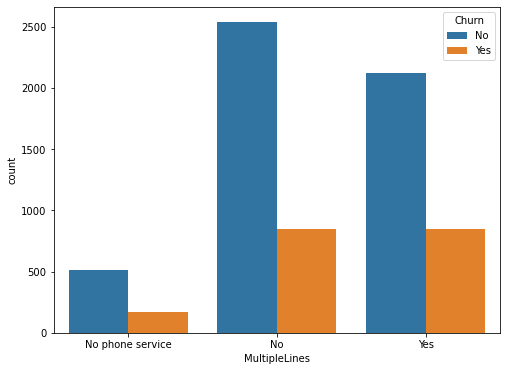

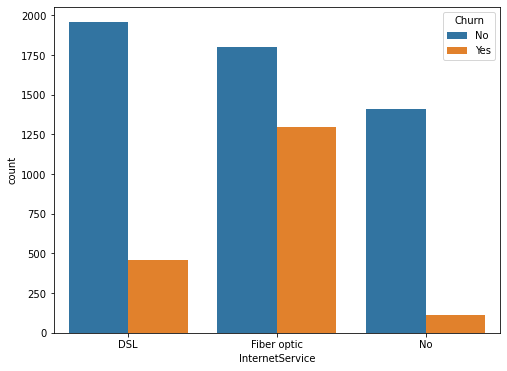

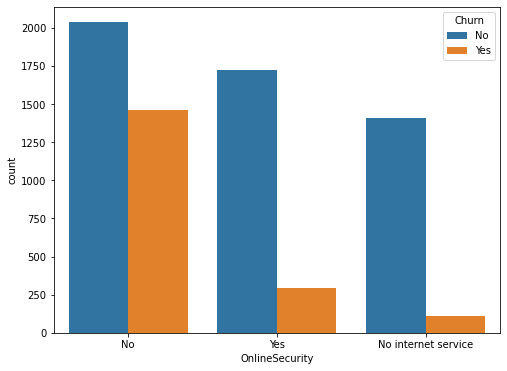

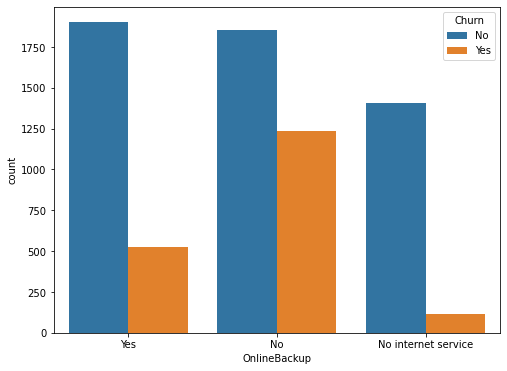

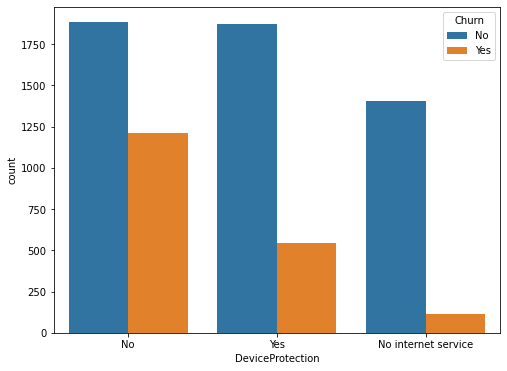

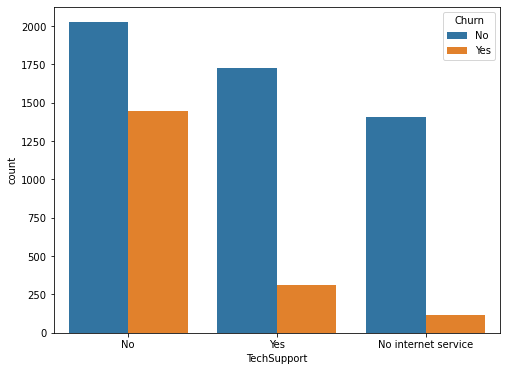

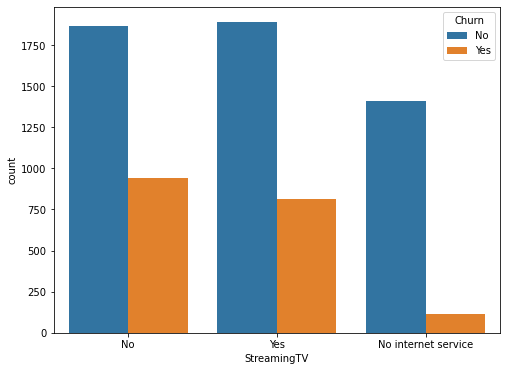

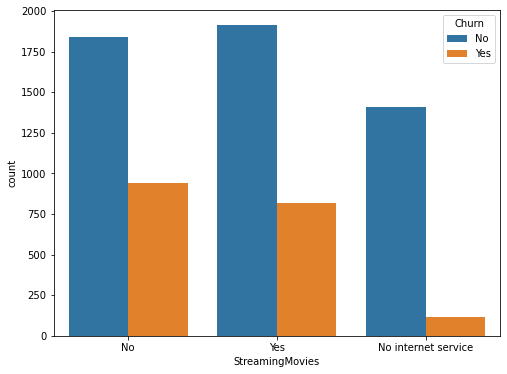

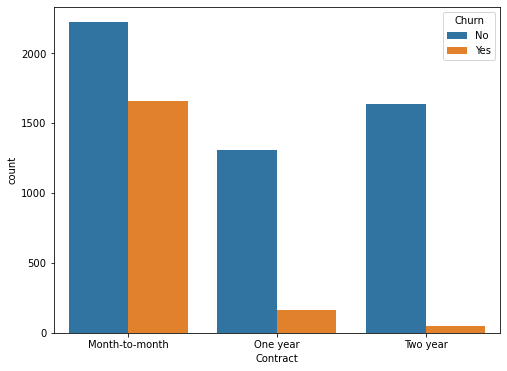

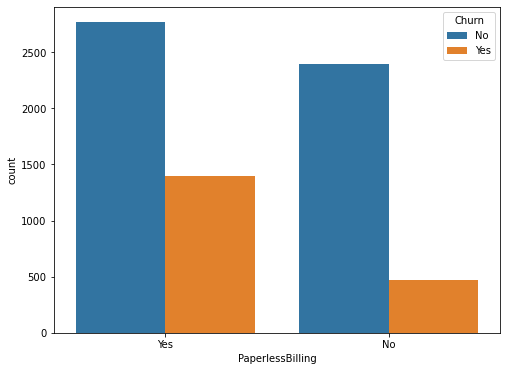

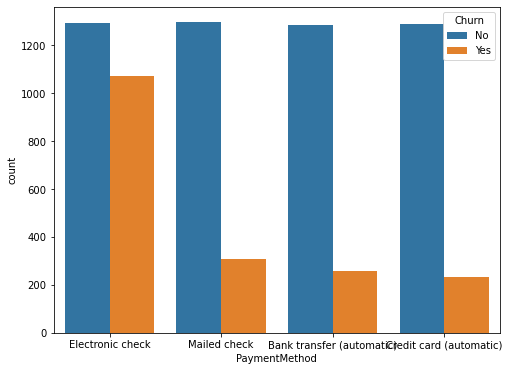

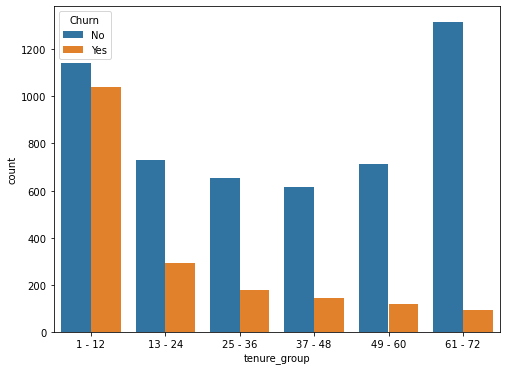

In [23]:
# Univariate Analysis
for i, predictor in enumerate(df_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df_copy, x=predictor, hue='Churn')

In [24]:
# Converting churners and non churners into numeric data
# df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)
dic = {"Yes":1, "No":0}
df_copy["Churn"] = df_copy["Churn"].map(dic)

In [25]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [26]:
# Getting dummy variables
df_dummies = pd.get_dummies(df_copy)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [27]:
df.shape

(7043, 21)

In [28]:
df_dummies.shape

(7032, 51)

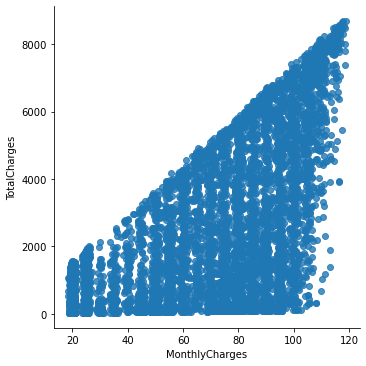

In [29]:
# relationship between monthly charges and total charges
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

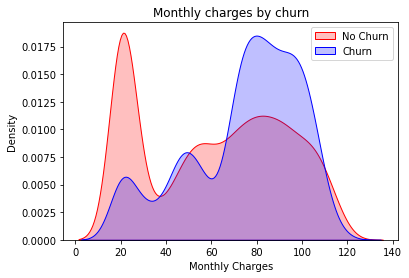

In [30]:
# Churn by monthly charges
mth_churn = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
mth_churn = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                        ax=mth_churn,
                        color="Blue", shade= True)
mth_churn.legend(["No Churn","Churn"],loc='upper right')
mth_churn.set_ylabel('Density')
mth_churn.set_xlabel('Monthly Charges')
mth_churn.set_title('Monthly charges by churn')

In [31]:
# Churn is high when monthly charges are high

Text(0.5, 1.0, 'Total charges by churn')

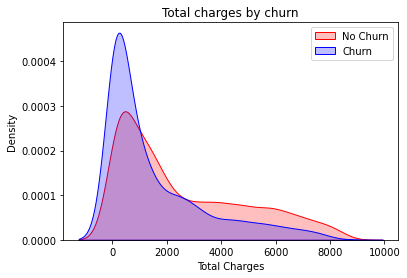

In [32]:
# Churn by total charges
tot_churn = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
tot_churn = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                        ax=tot_churn,
                        color="Blue", shade= True)
tot_churn.legend(["No Churn","Churn"],loc='upper right')
tot_churn.set_ylabel('Density')
tot_churn.set_xlabel('Total Charges')
tot_churn.set_title('Total charges by churn')

In [33]:
# Lower total charges lead to more churn rate

<AxesSubplot:>

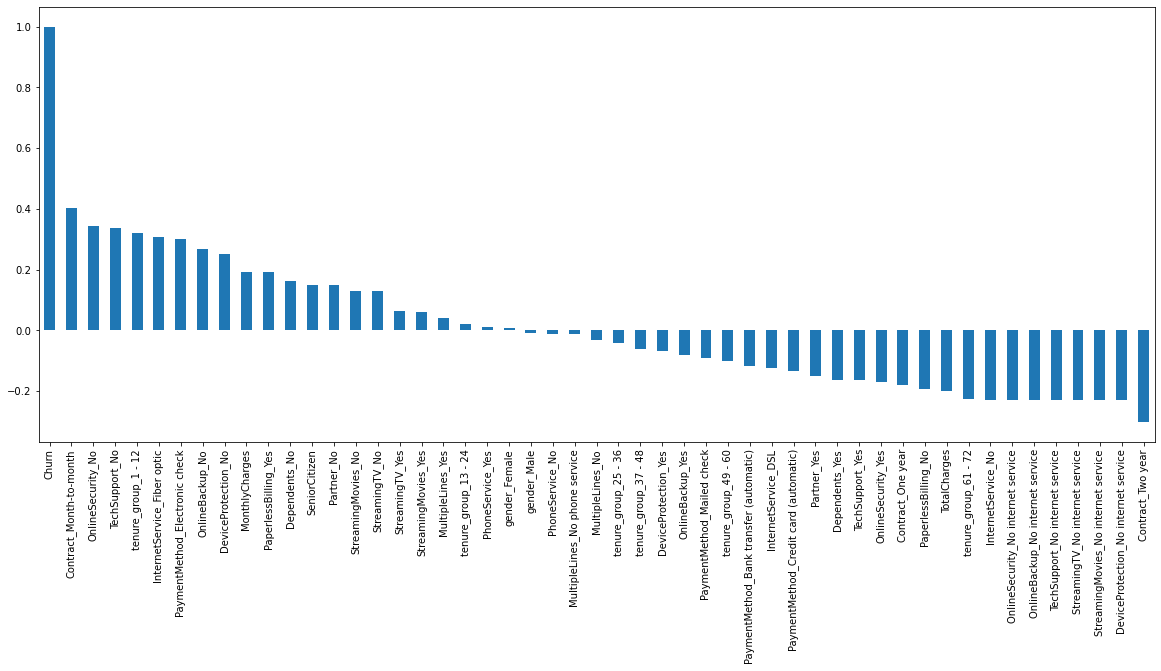

In [34]:
# Correlation figure
plt.figure(figsize=(20,8))
df_dummies.corr()["Churn"].sort_values(ascending = False).plot(kind='bar')

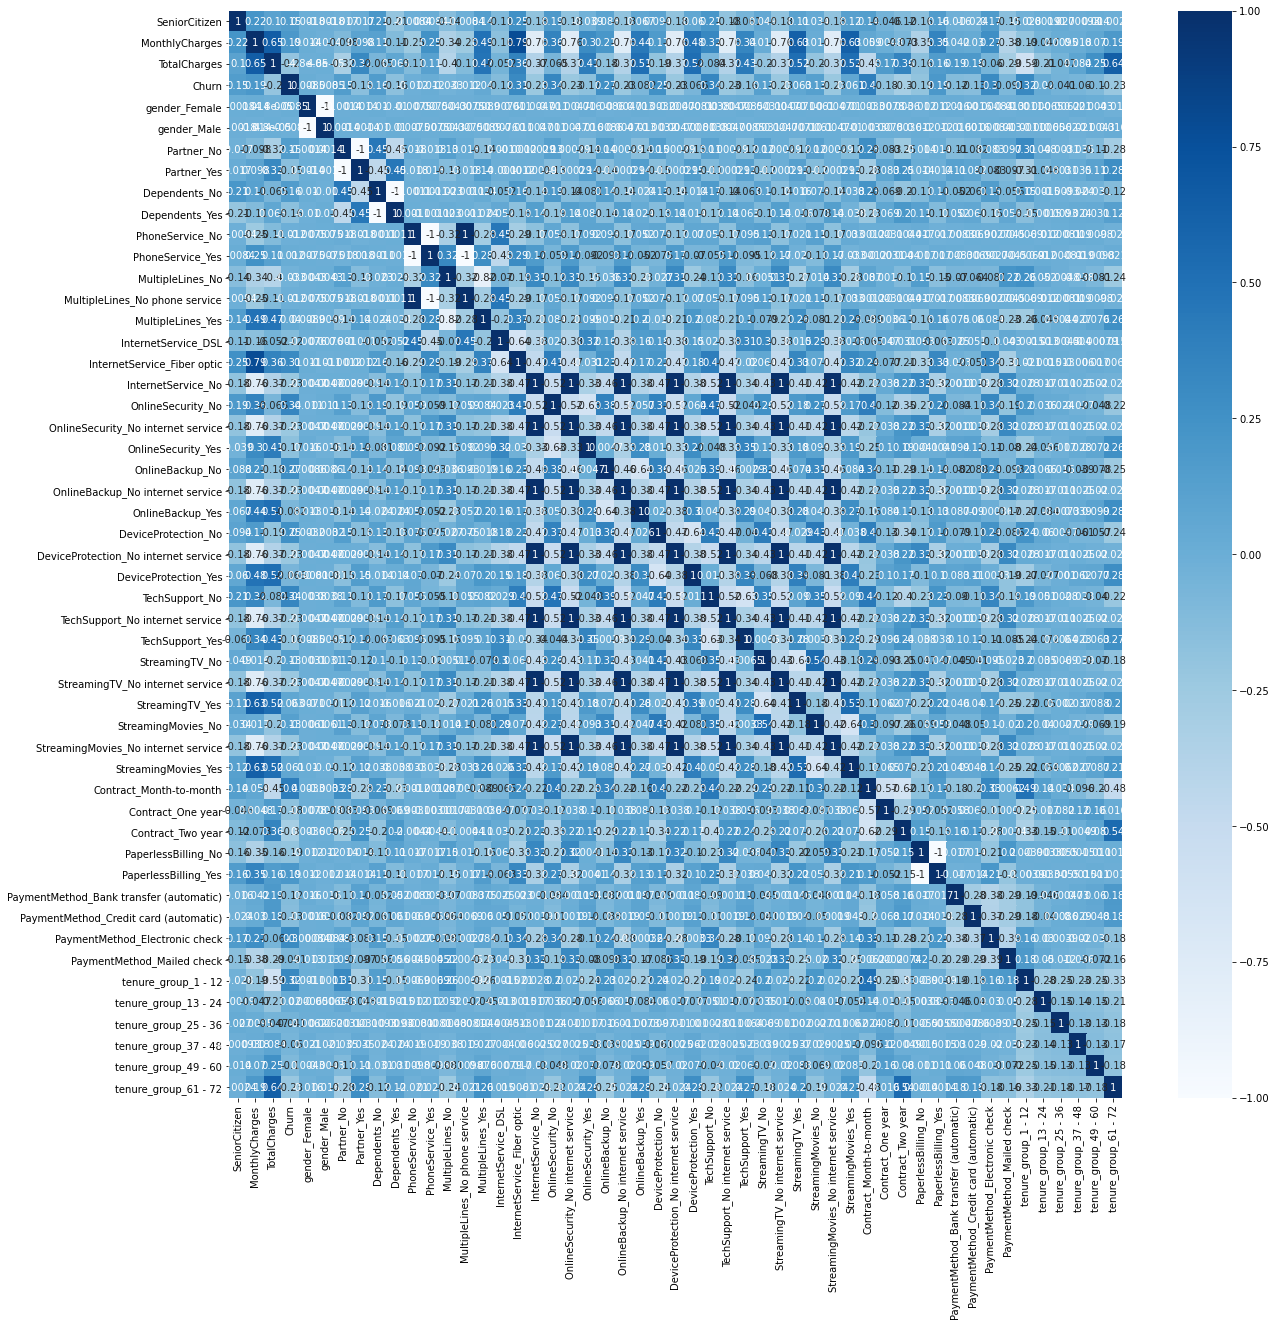

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df_dummies.corr(), cmap = "Blues", annot=True)
plt.show()

### Bivariate Analysis

In [36]:
new_df1_target0=df_copy.loc[df_copy["Churn"]==0]
new_df1_target1=df_copy.loc[df_copy["Churn"]==1]

In [37]:
def uniplot(df,col,title,hue =None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 30
    fig, ax = plt.subplots(figsize=(8,8))
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')      
    plt.show()

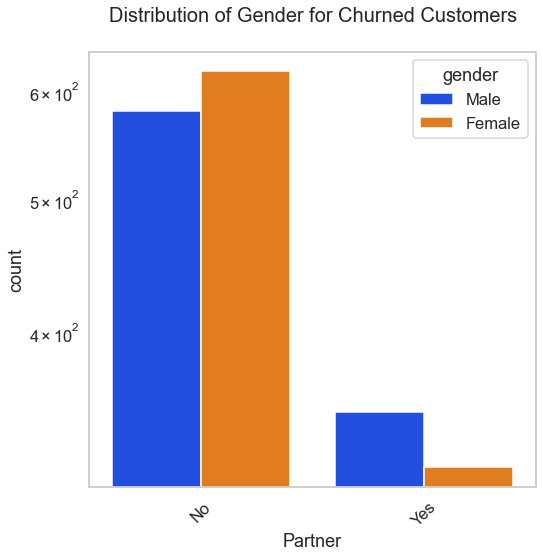

In [38]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

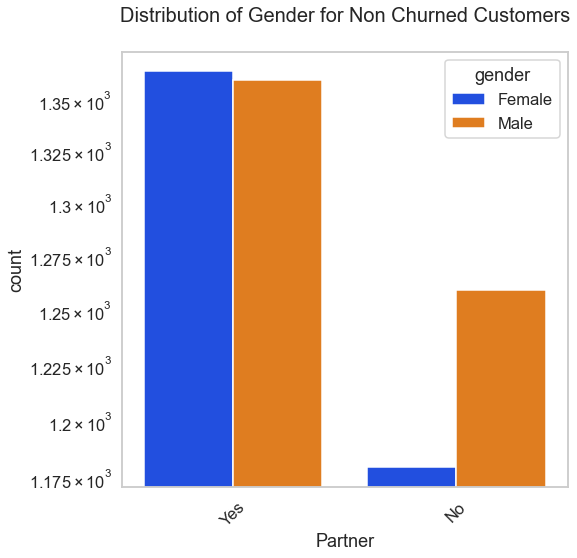

In [39]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

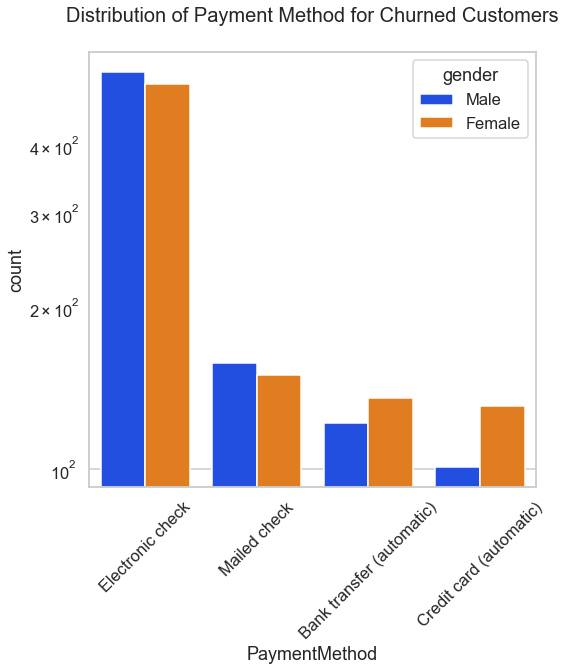

In [40]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of Payment Method for Churned Customers',hue='gender')

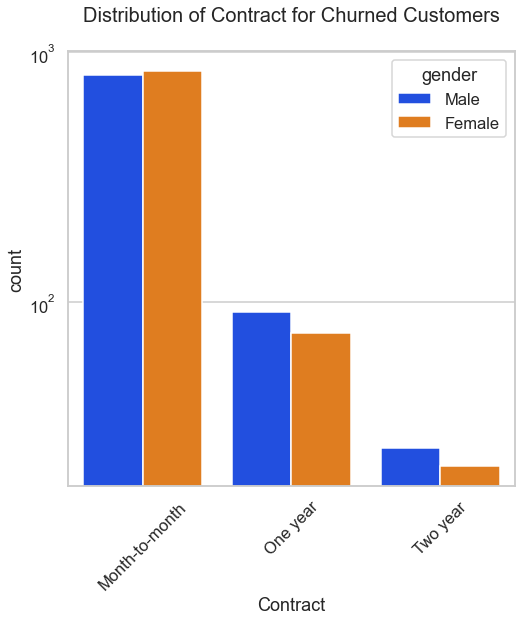

In [41]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

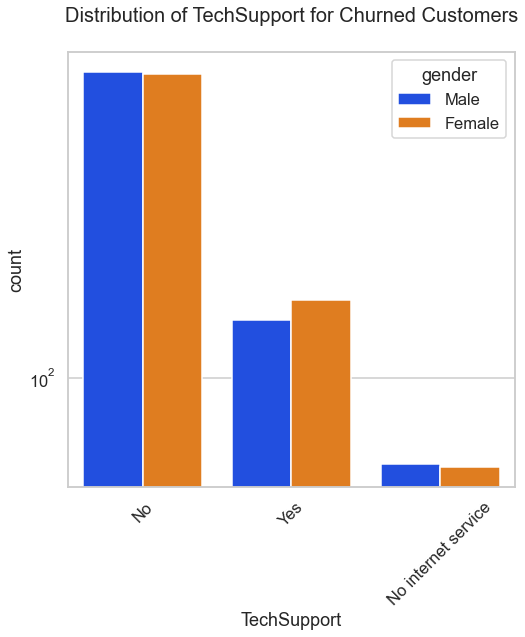

In [42]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

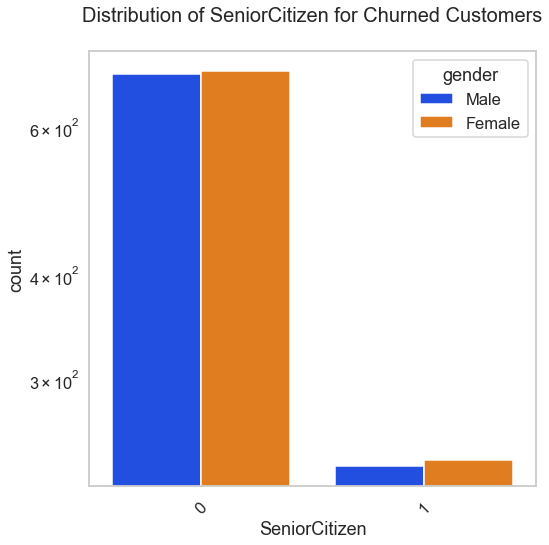

In [43]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

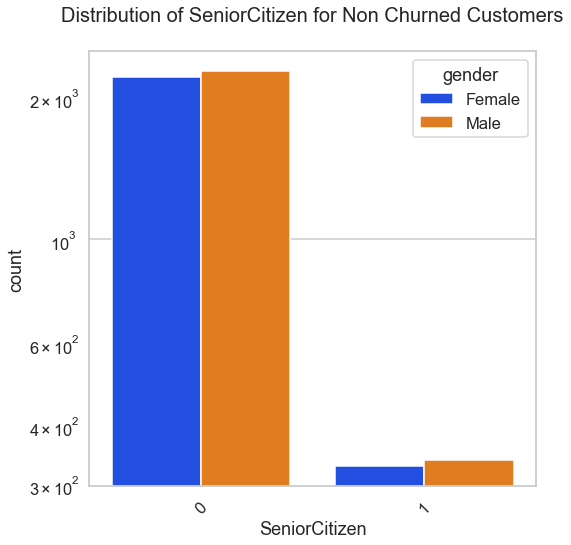

In [44]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of SeniorCitizen for Non Churned Customers',hue='gender')


In [45]:
df_dummies.to_csv(r"C:\Users\POWER\Desktop\programming\Machine Learning\Projects\customer_churn_dummies.csv")

## MODEL BUILDING

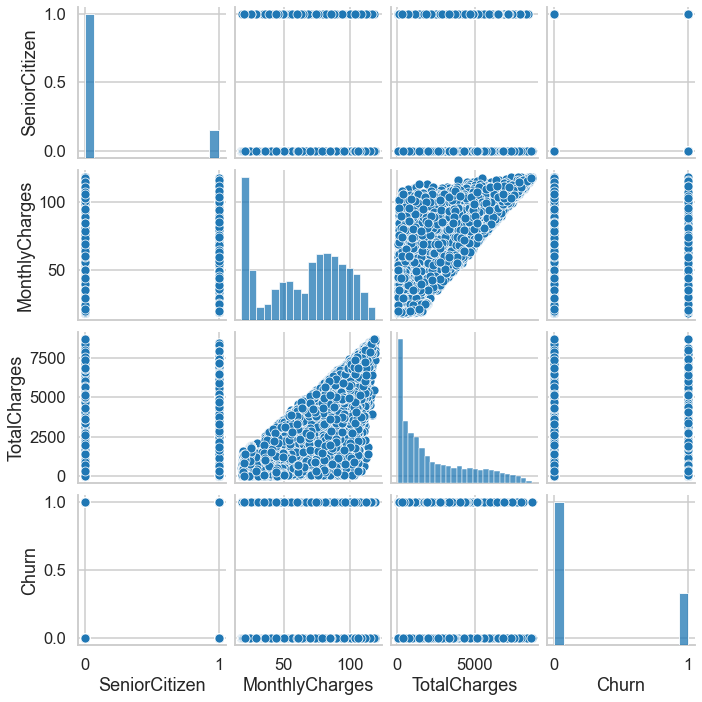

In [46]:
sns.pairplot(df_copy)

In [47]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN,SMOTETomek

In [50]:
df_model = pd.read_csv(r"C:\Users\POWER\Desktop\programming\Machine Learning\Projects\customer_churn_dummies.csv")

In [51]:
df_model

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103.20,7362.90,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29.60,346.45,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74.40,306.60,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [52]:
df_model.drop("Unnamed: 0", axis=1, inplace = True)

In [53]:
df_model

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [55]:
x = df_model.drop("Churn", axis=1).values
x

array([[0.0000e+00, 2.9850e+01, 2.9850e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 5.6950e+01, 1.8895e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 5.3850e+01, 1.0815e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 2.9600e+01, 3.4645e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.4400e+01, 3.0660e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0565e+02, 6.8445e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [56]:
y = df_model["Churn"].values
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [58]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred = tree_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[813 225]
 [170 199]]


0.7192608386638237

In [60]:
parameters = [{'max_depth': np.arange(3,9), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': np.arange(3,10)
              , 'max_features':['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = tree_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 78.88 %
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5}


In [61]:
x_df= df_model.drop("Churn", axis=1)
y_df= df_model["Churn"]

In [62]:
x_df

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [63]:
# Handling imbalanced dataset
sm = SMOTEENN(random_state =1)
X_resampled, y_resampled = sm.fit_resample(x_df,y_df)

In [64]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [65]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [66]:
model_dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [67]:
y_pred_resampled = model_dt_smote.predict(xr_test)
cm = confusion_matrix(yr_test, y_pred_resampled)
print(cm)
accuracy_score(yr_test, y_pred_resampled)

[[517  55]
 [ 26 569]]


0.9305912596401028

In [68]:
y_pred_resampled

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [69]:
xr_test

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
4329,0,80.550696,415.065853,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2598,0,68.950000,2038.700000,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
3258,0,40.100000,293.300000,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
2301,0,66.650000,520.950000,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2798,0,80.000000,412.500000,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,105.200000,4822.850000,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
4061,0,98.471902,1114.610069,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1162,1,25.100000,1672.150000,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
5553,0,71.621129,151.674240,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [70]:
# Using random forest
model_rf_smote = RandomForestClassifier()
model_rf_smote.fit(xr_train, yr_train)

RandomForestClassifier()

In [71]:
parameters = [{'n_estimators': np.arange(10,101,10), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': np.arange(3,10)
              , 'max_features':['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = model_rf_smote,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(xr_train, yr_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 95.11 %
Best Parameters: {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 40}


In [72]:
y_pred_rf = grid_search.predict(xr_test)
cm_rf = confusion_matrix(yr_test, y_pred_rf)
print(cm_rf)
accuracy_score(yr_test, y_pred_rf)

[[529  43]
 [ 18 577]]


0.9477292202227935

In [73]:
# Using XGBOOST

model_xgb_smote = XGBClassifier()
model_xgb_smote.fit(xr_train, yr_train)

C:\Users\POWER\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_pred_xgb = model_xgb_smote.predict(xr_test)
cm_xgb = confusion_matrix(yr_test, y_pred_xgb)
print(cm_xgb)
accuracy_score(yr_test, y_pred_xgb)

[[549  23]
 [ 19 576]]


0.9640102827763496

In [75]:
# XG Boost has highest accuracy...

In [76]:
# Deploying the model

def take_input():
    snr= str(input("Is the customer a senior citizen?"))
    mth_chr = float(input("Please enter the monthly charges:"))
    tot_chr = float(input("Please enter the total charges:"))
    gender = str(input("Please enter the gender:"))
    partner = str(input("Does the customer have a partner?"))
    dependents = str(input("Does the customer have any dependents?"))
    phone_service = str(input("Does the customer have a phone service?"))
    multiple_lines = str(input("Does the customer have multiple lines (Yes/No/No Phone Service)?"))
    int_service = str(input("What kind of internet service does the cutomer use?"))
    online_security = str(input("Does the customer have online security?"))
    online_backup = str(input("Does the customer have online backup?"))
    device_prot = str(input("Does the customer have device protection?"))
    tech_support = str(input("Does the customer have tech support?"))
    stream_TV = str(input("Does the customer stream TV?"))
    stream_movies = str(input("Does the customer stream movies?"))
    contract = str(input("What is the type of contract?"))
    billing = str(input("Is the billing paperless?"))
    payment = str(input("What is the payment method?"))
    tenure = str(input("What is the tenure group?"))

    if(snr=='Yes' or "yes"):
            snr_yes = 1
    elif(snr=="No" or "no"):
            snr_yes = 0

    if (gender=='Male'):
            gender_female = 0
            gender_male = 1
    
    elif (gender=="Female"):
            gender_female = 1
            gender_male = 0

    if (partner=='Yes'):
            partner_no = 0
            partner_yes = 1
                       
    elif (partner=='No'):
            partner_no = 1
            partner_yes = 0
            
    if (dependents=='Yes'):
            dependent_no = 0
            dependent_yes = 1
                       
    elif (dependents=='No'):
            dependent_no = 1
            dependent_yes = 0
            
    if (phone_service=='Yes'):
            phone_service_no = 0
            phone_service_yes = 1
                       
    elif (phone_service=='No'):
            phone_service_no = 1
            phone_service_yes = 0
            
    if (multiple_lines=='Yes'):
            multiple_lines_no = 1
            multiple_lines_no_ph_service = 0
            multiple_lines_yes = 0
                       
    elif (multiple_lines=='No Phone Service'):
            multiple_lines_no = 0
            multiple_lines_no_ph_service = 1
            multiple_lines_yes = 0
                       
    elif (multiple_lines=='No'):
            multiple_lines_no = 0
            multiple_lines_no_ph_service = 0
            multiple_lines_yes = 1
                       
    if (int_service=='DSL'):
            int_service_DSL = 1
            int_service_fib_opt = 0
            int_service_no = 0
                       
    elif (int_service=='Fibre Optic'):
            int_service_DSL = 0
            int_service_fib_opt = 1
            int_service_no = 0
                       
                       
    elif (int_service=='No Internet'):
            int_service_DSL = 0
            int_service_fib_opt = 0
            int_service_no = 1
                       
    if (online_security=='No'):
            online_security_no = 1
            online_security_no_int = 0
            online_security_yes = 0
                       
    elif (online_security=='No Internet'):
                       
            online_security_no = 0
            online_security_no_int = 1
            online_security_yes = 0

    elif (online_security=='Yes'):
            online_security_no = 0
            online_security_no_int = 0
            online_security_yes = 1
                       

    if (online_backup=='No'):
            online_backup_no = 1
            online_backup_no_int = 0
            online_backup_yes = 0
                       
    elif (online_backup=='No Internet'):
                       
            online_backup_no = 0
            online_backup_no_int = 1
            online_backup_yes = 0

    elif (online_backup=='Yes'):
            online_backup_no = 0
            online_backup_no_int = 0
            online_backup_yes = 1
                       
                       
    if (device_prot=='No'):
            device_prot_no = 1
            device_prot_no_int = 0
            device_prot_yes = 0
                       
    elif (device_prot=='No Internet'):
                       
            device_prot_no = 0
            device_prot_no_int = 1
            device_prot_yes = 0

    elif (device_prot=='Yes'):
            device_prot_no = 0
            device_prot_no_int = 0
            device_prot_yes = 1
            
    if (tech_support=='No'):
            tech_support_no = 1
            tech_support_no_int = 0
            tech_support_yes = 0
                       
    elif (tech_support=='No Internet'):
                       
            tech_support_no = 0
            tech_support_no_int = 1
            tech_support_yes = 0

    elif (tech_support=='Yes'):
            tech_support_no = 0
            tech_support_no_int = 0
            tech_support_yes = 1
                       
    if (stream_TV=='No'):
            stream_TV_no = 1
            stream_TV_no_int = 0
            stream_TV_yes = 0
                       
    elif (stream_TV=='No Internet'):
                       
            stream_TV_no = 0
            stream_TV_no_int = 1
            stream_TV_yes = 0

    elif (stream_TV=='Yes'):
            stream_TV_no = 0
            stream_TV_no_int = 0
            stream_TV_yes = 1
                       
    if (stream_movies=='No'):
            stream_movies_no = 1
            stream_movies_no_int = 0
            stream_movies_yes = 0
                       
    elif (stream_movies=='No Internet'):
                       
            stream_movies_no = 0
            stream_movies_no_int = 1
            stream_movies_yes = 0

    elif (stream_movies=='Yes'):
            stream_movies_no = 0
            stream_movies_no_int = 0
            stream_movies_yes = 1
                       
                       
    if (contract=='Month-to-Month'):
            ctr_m_to_m = 1
            ctr_one_year = 0
            ctr_two_year = 0
                       
    elif (contract=='One Year'):
            ctr_m_to_m = 0
            ctr_one_year = 1
            ctr_two_year = 0

    elif (contract=='Two Year'):
            ctr_m_to_m = 0
            ctr_one_year = 0
            ctr_two_year = 1
                       
                       
    if (billing=='Yes'):
            paperless_no = 0
            paperless_yes= 1

                       
    elif (billing=='No'):
            paperless_no = 1
            paperless_yes= 0
                       
    if (payment=='Bank Transfer (automatic)'):
            payment_bt_auto = 1
            payment_cr_auto= 0
            payment_elec_check = 0
            payment_mailed_check=0
    
    elif (payment=='Credit Card (automatic)'):
            payment_bt_auto = 0
            payment_cr_auto= 1
            payment_elec_check = 0
            payment_mailed_check=0

    elif (payment=='Electronic Check'):
            payment_bt_auto = 0
            payment_cr_auto= 0
            payment_elec_check = 1
            payment_mailed_check=0
                       
    elif (payment=='Mailed Check'):
            payment_bt_auto = 0
            payment_cr_auto= 0
            payment_elec_check = 0
            payment_mailed_check=1

    if (tenure == "1-12"):
            ten_1_12 = 1
            ten_13_24 = 0
            ten_25_36 = 0
            ten_37_48 = 0
            ten_49_60 = 0
            ten_61_72 = 0
                       
    elif (tenure == "13-24"):
            ten_1_12 = 0
            ten_13_24 = 1
            ten_25_36 = 0
            ten_37_48 = 0
            ten_49_60 = 0
            ten_61_72 = 0
                       
    elif (tenure == "25-36"):
            ten_1_12 = 0
            ten_13_24 = 0
            ten_25_36 = 1
            ten_37_48 = 0
            ten_49_60 = 0
            ten_61_72 = 0
                       
    elif (tenure == "37-48"):
            ten_1_12 = 0
            ten_13_24 = 0
            ten_25_36 = 0
            ten_37_48 = 1
            ten_49_60 = 0
            ten_61_72 = 0
                       
    elif (tenure == "49-60"):
            ten_1_12 = 0
            ten_13_24 = 0
            ten_25_36 = 0
            ten_37_48 = 0
            ten_49_60 = 1
            ten_61_72 = 0
                       
    elif (tenure == "61-72"):
            ten_1_12 = 0
            ten_13_24 = 0
            ten_25_36 = 0
            ten_37_48 = 0
            ten_49_60 = 0
            ten_61_72 = 1
                       
    
    prediction=model_dt_smote.predict([[
        snr_yes,
        mth_chr,
        tot_chr,
        gender_female,
        gender_male,
        partner_no,
        partner_yes,
        dependent_no,
        dependent_yes,
        phone_service_no,
        phone_service_yes,
        multiple_lines_no,
        multiple_lines_no_ph_service,
        multiple_lines_yes,
        int_service_DSL,
        int_service_fib_opt,
        int_service_no,
        online_security_no,
        online_security_no_int,
        online_security_yes,
        online_backup_no,
        online_backup_no_int,
        online_backup_yes,
        device_prot_no,
        device_prot_no_int,
        device_prot_yes,
        tech_support_no,
        tech_support_no_int,
        tech_support_yes,
        stream_TV_no,
        stream_TV_no_int,
        stream_TV_yes,
        stream_movies_no,
        stream_movies_no_int,
        stream_movies_yes,
        ctr_m_to_m,
        ctr_one_year,
        ctr_two_year,
        paperless_no,
        paperless_yes,
        payment_bt_auto,
        payment_cr_auto,
        payment_elec_check,
        payment_mailed_check,
        ten_1_12,
        ten_13_24,
        ten_25_36,
        ten_37_48,
        ten_49_60,
        ten_61_72,
        ]])
    
    print("\n")
    if (prediction ==0):
        return "The customer will not churn!"
    else:
        return "The customer will churn!!"
    
    
    
    

In [77]:
import pickle

In [78]:
pickle.dump(model_dt_smote, open(r'C:\Users\POWER\Desktop\programming\Machine Learning\Projects\churn_model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open(r'C:\Users\POWER\Desktop\programming\Machine Learning\Projects\churn_model.pkl','rb'))